In [1]:
#Importing Required Libraries

import numpy as np
import pandas as pd

In [2]:
#Loading data to a DataFrame using Pandas and displaying it

data=pd.read_excel('/home/mhmd/Documents/Datasets/Flight_Price/Train_data.xlsx')
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
#Permorming EDA

data.shape

(10683, 11)

In [4]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [7]:
data.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [8]:
data.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [9]:
data.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [10]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [11]:
#Dropping features that are not required to build our model

df1=data.copy()
df1.drop(['Route','Dep_Time','Arrival_Time','Additional_Info'],axis=1,inplace=True)
df1.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,13302


In [12]:
#Checking for null values

df1.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [13]:
#There are many methods to deal with null values which include imputer and machine learning algorithms.
#Here I am just dropping it, Because it's very low in count

df1.dropna(inplace=True)
df1.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [14]:
#Cleaning Destination Feature

df2=df1.copy()
df2['Destination']=df2.Destination.apply(lambda x: 'Delhi' if x=='New Delhi' else x)
df2.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [15]:
def con(x):
    try:
        return int(x.split(' ')[0])
    except:
        return 0

In [16]:
#Cleaning Total Stops Feature

df3=df2.copy()
df3['Total_Stops']=df3['Total_Stops'].apply(lambda x: con(x))
df3.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [17]:
def con1(x):
    time=0
    for i in x.split(' '):
        if i[len(i)-1]=='h' or i[len(i)-1]=='H':
            time=time+(int((i[:len(i)-1]))/24)
        elif i[len(i)-1]=='m' or i[len(i)-1]=='M':
            time=time+(int(i[:len(i)-1])/1440)
        else:
            return x
    return float("{:.2f}".format(time))

In [18]:
#Converting Total Duration to Day

df4=df3.copy()
df4['Duration']=df3['Duration'].apply(lambda x: con1(x))
df4.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,Delhi,0.12,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,0.31,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,0.79,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,0.23,1,6218
4,IndiGo,01/03/2019,Banglore,Delhi,0.20,1,13302


In [19]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Duration         10682 non-null  float64
 5   Total_Stops      10682 non-null  int64  
 6   Price            10682 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 667.6+ KB


In [20]:
def con2(x):
    if(x.split('/')[0]==x):
        return False
    else:
        return True

In [21]:
#Checking that is any symbol used in Date_of_Journey Other than / 

df4[~df4.Date_of_Journey.apply(con2)].head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price


In [22]:
#[Feature Engineering] Converting Date Of Jouney into day,month and year

df5=df4.copy()
df5['Day']=df5.Date_of_Journey.apply(lambda x: int(x.split('/')[0]))
df5['Month']=df5.Date_of_Journey.apply(lambda x: int(x.split('/')[1]))
df5['Year']=df5.Date_of_Journey.apply(lambda x: int(x.split('/')[2]))
df5.drop(['Date_of_Journey'],axis=1,inplace=True)
df5.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year
0,IndiGo,Banglore,Delhi,0.12,0,3897,24,3,2019
1,Air India,Kolkata,Banglore,0.31,2,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,0.79,2,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,0.23,1,6218,12,5,2019
4,IndiGo,Banglore,Delhi,0.20,1,13302,1,3,2019


In [23]:
#Performing One Hot Encoder 

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ct=make_column_transformer([OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False),['Airline','Source','Destination']],remainder='passthrough')
temp=ct.fit_transform(df5)
column_names=list(ct.get_feature_names_out())
df6=pd.DataFrame(temp,columns=column_names)
df6.head()

,onehotencoder__Airline_Air India,onehotencoder__Airline_GoAir,onehotencoder__Airline_IndiGo,onehotencoder__Airline_Jet Airways,onehotencoder__Airline_Jet Airways Business,onehotencoder__Airline_Multiple carriers,onehotencoder__Airline_Multiple carriers Premium economy,onehotencoder__Airline_SpiceJet,onehotencoder__Airline_Trujet,onehotencoder__Airline_Vistara,...,onehotencoder__Destination_Cochin,onehotencoder__Destination_Delhi,onehotencoder__Destination_Hyderabad,onehotencoder__Destination_Kolkata,remainder__Duration,remainder__Total_Stops,remainder__Price,remainder__Day,remainder__Month,remainder__Year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.12,0.0,3897.0,24.0,3.0,2019.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.31,2.0,7662.0,1.0,5.0,2019.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.79,2.0,13882.0,9.0,6.0,2019.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.23,1.0,6218.0,12.0,5.0,2019.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.20,1.0,13302.0,1.0,3.0,2019.0


In [24]:
x=df6.drop(['remainder__Price'],axis=1)
y=df6.remainder__Price

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.2)

In [28]:
#Here I am Using RandomForestRegressor as my model
#Finding Optimal value for n_estimators

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from tqdm import tqdm

In [29]:
est=[]
acc=[]
for i in tqdm(range(1,200)):
    sample_model=RandomForestRegressor(n_estimators=i)
    sample_model.fit(x_train,y_train)
    y_pred=sample_model.predict(x_test)
    score=r2_score(y_test,y_pred)
    est.append(i)
    acc.append(score)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [07:37<00:00,  2.30s/it]


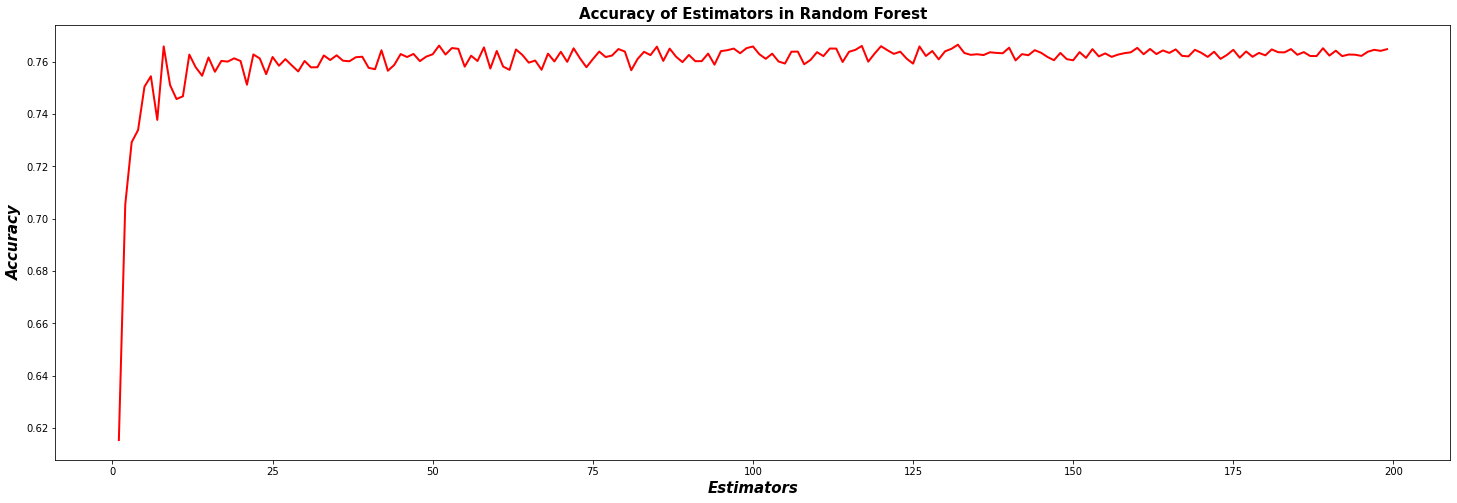

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
plt.plot(est,acc,'r',linewidth=2)
plt.xlabel('Estimators',fontweight='bold',style='italic',size=15)
plt.ylabel('Accuracy',fontweight='bold',style='italic',size=15)
plt.title('Accuracy of Estimators in Random Forest',fontweight='bold',size=15)
plt.show()

In [31]:
#From the above plot, we can use n_estimators above 30

model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f'Score  : {r2_score(y_test,y_pred)}')

Score  : 0.7608704632214247
